###  Created by Luis A. Sanchez-Perez (alejand@umich.edu).
<p><span style="color:green"><b>Copyright &#169;</b> Do not distribute or use without authorization from author.</span></p>

In [1]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import scipy.io as sio
import numpy as np
from training import *
from optimizers import *

### 1. Read a prepares dataset for training
In this section we read the dataset.

In [2]:
# Load dataset
dataset = sio.loadmat('../../datasets/classification/demolog1.mat')
# Defines optimizer
optimizer = NewtonsMethodOptimizer()

### 2. Two features and linear boundary
In this section we fit a logistic regression model not using any polynomial term so the result is a linear boundary. Clearly there is no perfect linear separatation between both classes.

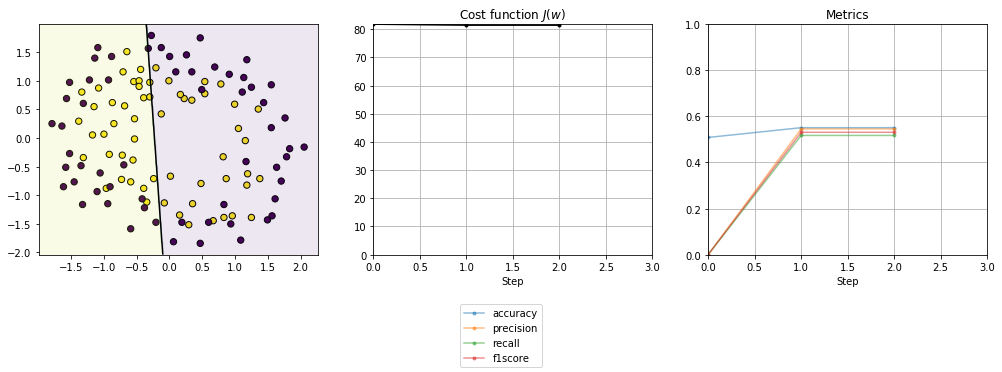

In [3]:
# Applies transformations to training data
X = dataset['X']
y = dataset['y'].flatten()
ps = PolynomialFeatures(degree=1)
ps.fit(X)
X = ps.transform(X)
sc = StandardScaler()
sc.fit(X[:,1:])
X[:,1:] = sc.transform(X[:,1:])
# Trains logistic regression model
point = 1e-4 * np.random.randn(X.shape[1],)
log = train(X, y, point, optimizer, epochs=200)
# Shows training animation
TrainingAnimation2D(log, X, y, polynomial=ps, scaler=sc).start()

### 3. Two features and non-linear boundary
Here we use the same two features and in the previous section but now performing a polynomial expansion adding second order terms.

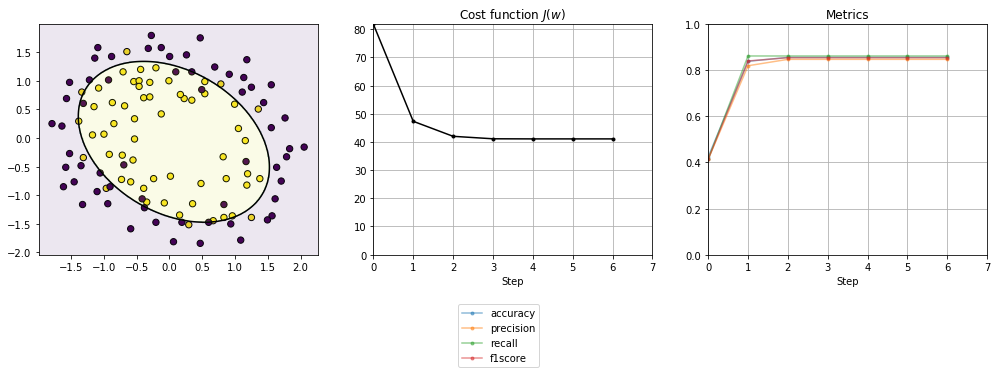

In [4]:
# Applies transformations to training data
X = dataset['X']
y = dataset['y'].flatten()
ps = PolynomialFeatures(degree=2)
ps.fit(X)
X = ps.transform(X)
sc = StandardScaler()
sc.fit(X[:,1:])
X[:,1:] = sc.transform(X[:,1:])
# Trains logistic regression model
point = 1e-4 * np.random.randn(X.shape[1],)
log = train(X, y, point, optimizer, epochs=200)
# Shows training animation
TrainingAnimation2D(log, X, y, polynomial=ps, scaler=sc).start()

### 4. Two features but a more complex non-linear boundary
Here we use the same two features and in the previous section but now performing a polynomial expansion adding polynomial terms up to seventh order. You can start seeing really complex boundaries.

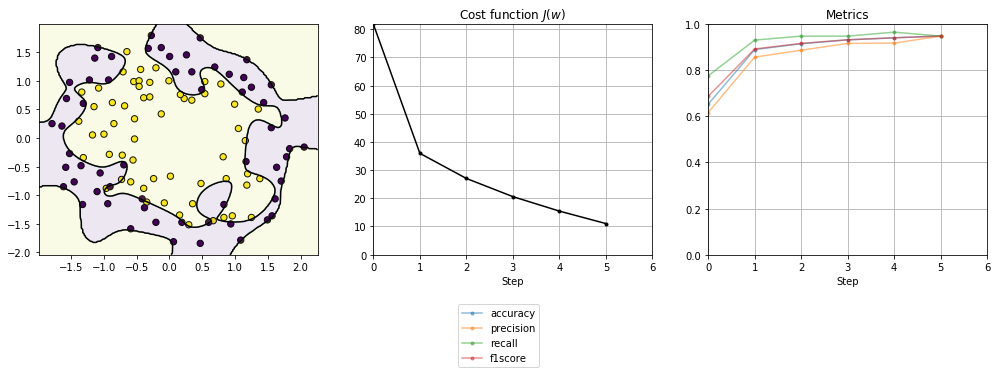

In [5]:
# Applies transformations to training data
X = dataset['X']
y = dataset['y'].flatten()
ps = PolynomialFeatures(degree=10)
ps.fit(X)
X = ps.transform(X)
sc = StandardScaler()
sc.fit(X[:,1:])
X[:,1:] = sc.transform(X[:,1:])
# Trains logistic regression model
point = 1e-4 * np.random.randn(X.shape[1],)
log = train(X, y, point, optimizer, epochs=200)
# Shows training animation
TrainingAnimation2D(log, X, y, polynomial=ps, scaler=sc).start()